# Loan Risk Analysis
When companies give out loans, they make their money off of the interest while the loan is held by the customer. At the end of the day for them it is about increasing their bottom line. If they aren't able to qualify and assess the risk of each potential loan then they run the risk of potentially holding too many risky assets which lead to more costs down the road which in turn will decrease the bottom line.

### Accepted Loans then leads to 3 possible results:

* Fully Paid
* Current
* Charged Off/Default

In this case we are using lending club loan data which is a peer to peer platform where investors(these are the lenders) will loan money using the lending club platform. In our situation we want to understand the driving factors behind loan default which will allow the company (Lending club) the ability to do portfolio and risk asessment.

This is where the Data Scientist (ME!) comes in and I will run an analysis on this data to see if we can determine what factors will determine loan risk and how we can minimize it.

### The Data
Our dataset is from Lending Club's Public loan data for all funded loans from 2007 to 2018 and you can find it here: 
https://www.kaggle.com/wendykan/lending-club-loan-data

Each loan includes the applicant information that was provided and the loan status (current, late, fully paid...)

The main question we will be asking ourselves is whether or not we can build a machine learning model that can accurately predict if a borrower will pay off their loan on time?

In [1]:
#Imports(with versions for reproducibility)
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Seaborn Version:', sns.__version__)
print('Matplotlib Version:', matplotlib.__version__)
print('Plotly Version:', py.__version__)

Numpy Version: 1.17.3
Pandas Version: 0.25.1
Seaborn Version: 0.9.0
Matplotlib Version: 3.0.3
Plotly Version: 4.4.1


In [2]:
#Read in the messy dataset
loan_stats = pd.read_csv('~/Portfolio/Loan Risk Analysis/lending-club-loan-data/loan.csv')

/home/j/python3.7dev1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
#Take a look at a small amount of our data
display(loan_stats.head())
display(loan_stats.describe())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [4]:
#Lets take a look at the columns in the dataset
loan_stats.info(max_cols = 200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
id                                            0 non-null float64
member_id                                     0 non-null float64
loan_amnt                                     2260668 non-null int64
funded_amnt                                   2260668 non-null int64
funded_amnt_inv                               2260668 non-null float64
term                                          2260668 non-null object
int_rate                                      2260668 non-null float64
installment                                   2260668 non-null float64
grade                                         2260668 non-null object
sub_grade                                     2260668 non-null object
emp_title                                     2093699 non-null object
emp_length                                    2113761 non-null object
home_ownership                                2260668 n

#### The target column we are interested in is the loan_status column where we can see Fully Paid, Current, etc...

In [5]:
loan_stats['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

(0, 1146147.2000000002)

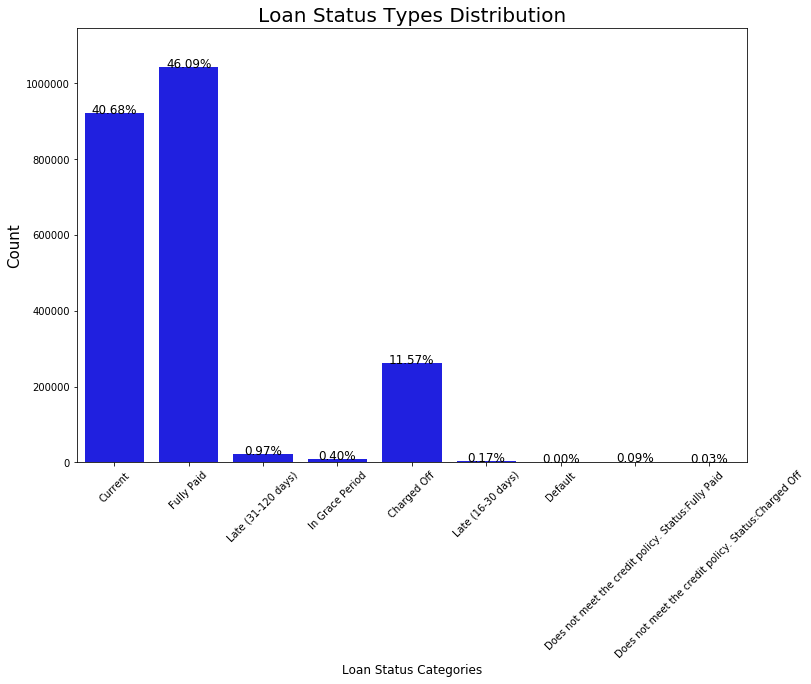

In [6]:
#visualize the distribution of the loan_status column
plt.figure(figsize = (12,8))
ls_plot = sns.countplot(x='loan_status', data=loan_stats, color='b')
ls_plot.set_xticklabels(ls_plot.get_xticklabels(), rotation=45)
ls_plot.set_xlabel("Loan Status Categories", fontsize=12)
ls_plot.set_ylabel("Count", fontsize=15)
ls_plot.set_title("Loan Status Types Distribution", fontsize=20)
           
sizes = []
total = len(loan_stats)
for p in ls_plot.patches:
    height = p.get_height()
    sizes.append(height)
    ls_plot.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ls_plot.set_ylim(0, max(sizes) * 1.10)

#### We are going to remove the current, grace, late, doesn't meet credit policy loans because they don't tell us whether or not the person is going to default...

In [7]:
loan_stats = loan_stats.loc[loan_stats['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [8]:
#Now we can look at our new loan status values
loan_stats['loan_status'].value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

(0, 1146147.2000000002)

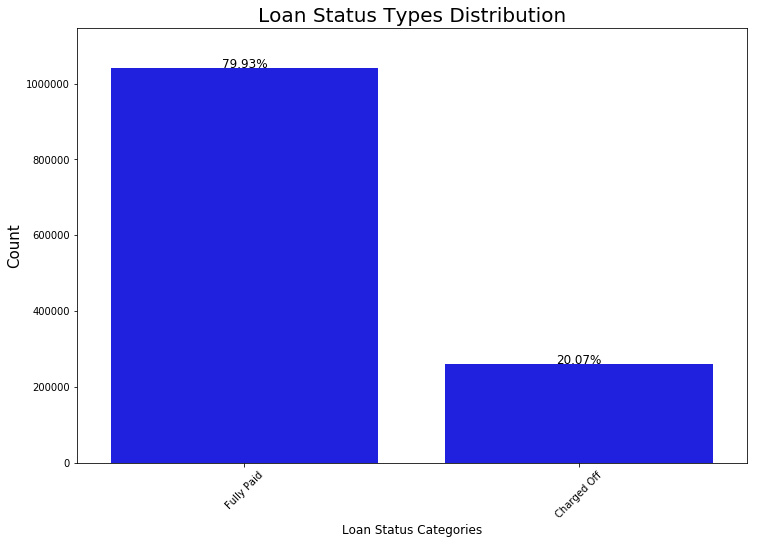

In [9]:
#New visualization of the Loan Status Distribution after removing the unnecessary values
plt.figure(figsize = (12,8))
ls_plot = sns.countplot(x='loan_status', data=loan_stats, color='b')
ls_plot.set_xticklabels(ls_plot.get_xticklabels(), rotation=45)
ls_plot.set_xlabel("Loan Status Categories", fontsize=12)
ls_plot.set_ylabel("Count", fontsize=15)
ls_plot.set_title("Loan Status Types Distribution", fontsize=20)
           
sizes = []
total = len(loan_stats)
for p in ls_plot.patches:
    height = p.get_height()
    sizes.append(height)
    ls_plot.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ls_plot.set_ylim(0, max(sizes) * 1.10)

In [10]:
#Next column we are going to visualize is the Purpose column to get an understanding of what people are using their loans for
loan_stats['purpose'].value_counts()

debt_consolidation    757591
credit_card           285704
home_improvement       84495
other                  74934
major_purchase         28328
medical                15023
small_business         15010
car                    14120
moving                  9172
vacation                8732
house                   6967
wedding                 2294
renewable_energy         911
educational              326
Name: purpose, dtype: int64

(0, 833350.1000000001)

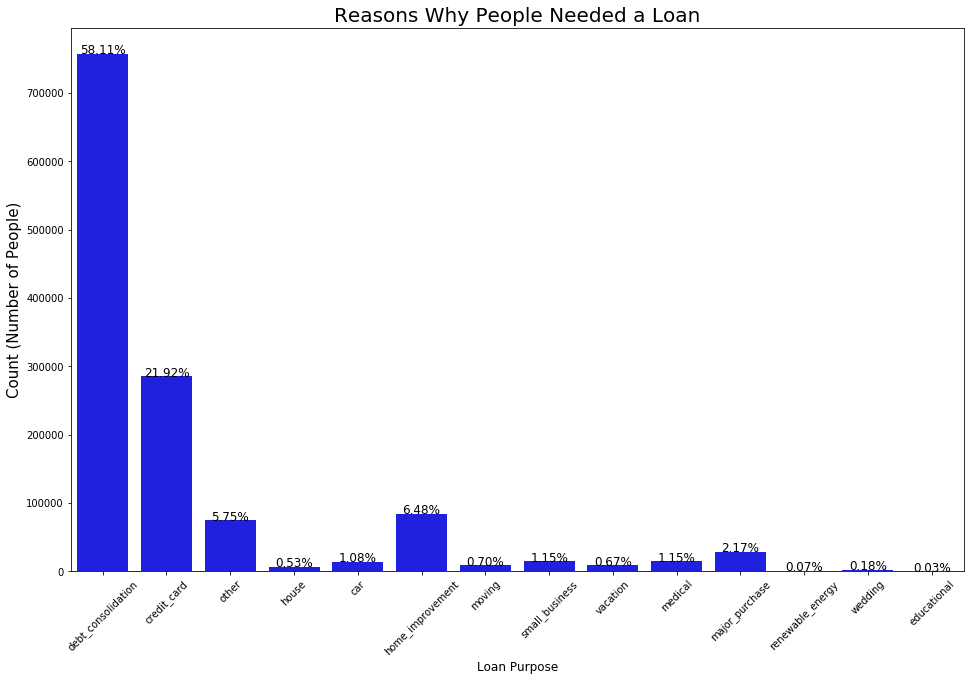

In [11]:
#Visualization of the Reasons why customers needed a loan
plt.figure(figsize = (16,10))
ls_plot2 = sns.countplot(x='purpose', data=loan_stats, color='b')
ls_plot2.set_xticklabels(ls_plot2.get_xticklabels(), rotation=45)
ls_plot2.set_xlabel("Loan Purpose", fontsize=12)
ls_plot2.set_ylabel("Count (Number of People)", fontsize=15)
ls_plot2.set_title("Reasons Why People Needed a Loan", fontsize=20)

sizes = []
total = len(loan_stats)
for p in ls_plot2.patches:
    height = p.get_height()
    sizes.append(height)
    ls_plot2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ls_plot.set_ylim(0, max(sizes) * 1.10)

In [12]:
#Take a look at how many nulls there are for the purpose column
sum(loan_stats.purpose.isnull())

0

Text(0, 0.5, 'Average loan amount issued')

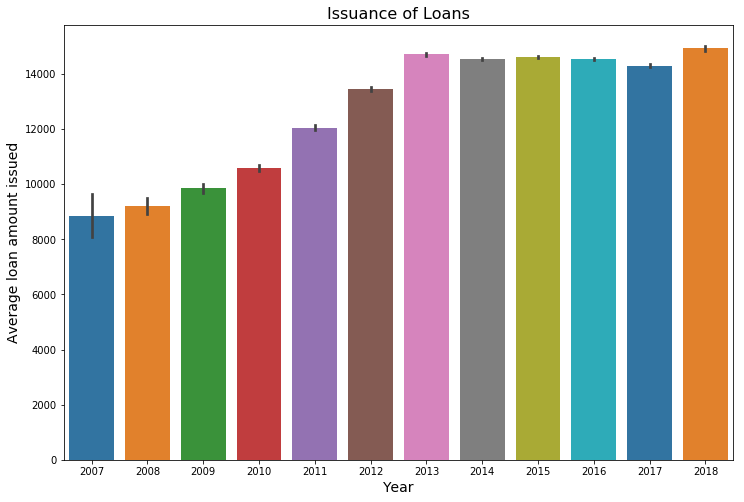

In [13]:
loan_stats['issue_d'].head()
dt_series = pd.to_datetime(loan_stats['issue_d'])

plt.figure(figsize=(12,8))
sns.barplot(dt_series.dt.year, 'loan_amnt', data=loan_stats, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

#### We have about 145 columns and so it is good to get an understanding of each of them and understand what they mean. We can do so by looking at the data dictionary provided along with the dataset...


In [14]:
loan_stats.info(null_counts=True, max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 145 columns):
id                                            0 non-null float64
member_id                                     0 non-null float64
loan_amnt                                     1303607 non-null int64
funded_amnt                                   1303607 non-null int64
funded_amnt_inv                               1303607 non-null float64
term                                          1303607 non-null object
int_rate                                      1303607 non-null float64
installment                                   1303607 non-null float64
grade                                         1303607 non-null object
sub_grade                                     1303607 non-null object
emp_title                                     1221028 non-null object
emp_length                                    1228153 non-null object
home_ownership                                1303607

In [15]:
# We remove any columns with more than 70% null values
for column in loan_stats.columns:
    if (sum(loan_stats[column].isnull() / len(loan_stats))) > .70:
        loan_stats = loan_stats.drop(column, axis = 1)

In [16]:
#This brings us from 145 to 103 columns
loan_stats.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 103 columns):
loan_amnt                         1303607 non-null int64
funded_amnt                       1303607 non-null int64
funded_amnt_inv                   1303607 non-null float64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
grade                             1303607 non-null object
sub_grade                         1303607 non-null object
emp_title                         1221028 non-null object
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
issue_d                           1303607 non-null object
loan_status                       1303607 non-null object
pymnt_plan  

In [17]:
#Take a look at which columns are which kind of data... (Strings, Ints, or Floats)
strings = []
numerical_int = []
numerical_flt = []
for column in loan_stats.columns:
    if loan_stats[column].dtypes == 'object':
        strings.append(column)
    elif loan_stats[column].dtypes == 'int64':
        numerical_int.append(column)
    else:
        numerical_flt.append(column)

In [18]:
#Take a look at the categorical columns and the value counts
loan_stats[strings].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 22 columns):
term                    1303607 non-null object
grade                   1303607 non-null object
sub_grade               1303607 non-null object
emp_title               1221028 non-null object
emp_length              1228153 non-null object
home_ownership          1303607 non-null object
verification_status     1303607 non-null object
issue_d                 1303607 non-null object
loan_status             1303607 non-null object
pymnt_plan              1303607 non-null object
purpose                 1303607 non-null object
title                   1288181 non-null object
zip_code                1303606 non-null object
addr_state              1303607 non-null object
earliest_cr_line        1303607 non-null object
initial_list_status     1303607 non-null object
last_pymnt_d            1301347 non-null object
last_credit_pull_d      1303553 non-null object
application_type     

In [19]:
#we are going to drop some more columns which are redundant in our dataset:
#emp_title may be useful if you wanted to further down the road use this to create new features based on the emp_title
loan_stats = loan_stats.drop(columns=['funded_amnt', 'funded_amnt_inv', 'grade', 'sub_grade',  'emp_title', 'issue_d'], axis=1)

In [20]:
#Now we are down to 97 columns after removing some of the redundant information
loan_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 97 columns):
loan_amnt                         1303607 non-null int64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
loan_status                       1303607 non-null object
pymnt_plan                        1303607 non-null object
purpose                           1303607 non-null object
title                             1288181 non-null object
zip_code                          1303606 non-null object
addr_state                        1303607 non-null object
dti                               1303295 non-null float64
delinq_2yrs 

We will go in and remove the zip code because it only contains the first 3 digits of the borrowers zip which only allows us to know which state they are from and since we already have an addr_state column which tells us the state that is more redundant information. We are also going to remove out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp because none of these are available before the investor decides to fully fund the loan and therefore would cause some data leaks and we dont want that.

In [21]:
loan_stats = loan_stats.drop(['zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp' ], axis=1)

In [22]:
#Now we are down to 91 columns...
loan_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 91 columns):
loan_amnt                         1303607 non-null int64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
loan_status                       1303607 non-null object
pymnt_plan                        1303607 non-null object
purpose                           1303607 non-null object
title                             1288181 non-null object
addr_state                        1303607 non-null object
dti                               1303295 non-null float64
delinq_2yrs                       1303607 non-null float64
earliest_cr

(0, 1408407.0)

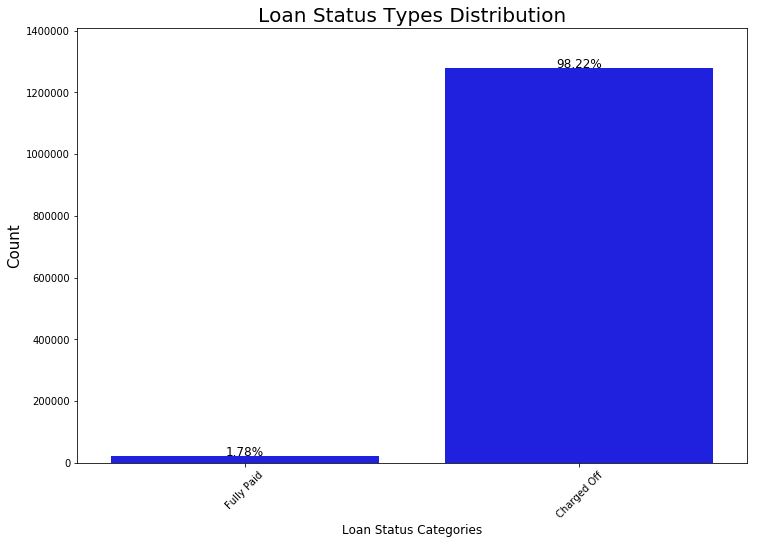

In [23]:
#Here we can see most people are filing individual applications
loan_stats['application_type'].value_counts()

plt.figure(figsize = (12,8))
ls_plot3 = sns.countplot(x='application_type', data=loan_stats, color='b')
ls_plot3.set_xticklabels(ls_plot.get_xticklabels(), rotation=45)
ls_plot3.set_xlabel("Loan Status Categories", fontsize=12)
ls_plot3.set_ylabel("Count", fontsize=15)
ls_plot3.set_title("Loan Status Types Distribution", fontsize=20)
           
sizes = []
total = len(loan_stats)
for p in ls_plot3.patches:
    height = p.get_height()
    sizes.append(height)
    ls_plot3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ls_plot3.set_ylim(0, max(sizes) * 1.10)

In [24]:
# We are going to remove a few more columns because they tell us some redundant information or cause data leaks
columns_tbr = ['pymnt_plan', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
loan_stats = loan_stats.drop(columns_tbr, axis=1)

In [25]:
#Making some progress on cleaning our dataset we are now down to 79 columns
loan_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 79 columns):
loan_amnt                         1303607 non-null int64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
loan_status                       1303607 non-null object
purpose                           1303607 non-null object
title                             1288181 non-null object
addr_state                        1303607 non-null object
dti                               1303295 non-null float64
delinq_2yrs                       1303607 non-null float64
earliest_cr_line                  1303607 non-null object
inq_last_6m

In [26]:
#After a decent amount of cleaning we should take a look at the current size of our data
loan_stats.shape

(1303607, 79)

In [27]:
# We are going to essentially one hot encode our variables or map them to 1 and 0 where a 1 means the loan was fully paid off and a 0 means it was not.
loan_stats = loan_stats.replace({'loan_status': {'Fully Paid': 1, 'Charged Off': 0}})

#Take a look at the loan status column to ensure it was properly setup
loan_stats['loan_status']

100        1
152        1
170        1
186        1
215        1
          ..
2260654    0
2260655    0
2260656    1
2260658    1
2260664    1
Name: loan_status, Length: 1303607, dtype: int64

In [28]:
#Creating a new csv file to continue manipulating our data
loan_stats.to_csv('filtered_loan_stats.csv')

In [29]:
loan_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 79 columns):
loan_amnt                         1303607 non-null int64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
loan_status                       1303607 non-null int64
purpose                           1303607 non-null object
title                             1288181 non-null object
addr_state                        1303607 non-null object
dti                               1303295 non-null float64
delinq_2yrs                       1303607 non-null float64
earliest_cr_line                  1303607 non-null object
inq_last_6mt

In [30]:
loan_stats_filtered = pd.read_csv('filtered_loan_stats.csv', index_col=0)

/home/j/python3.7dev1/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [31]:
#Taking a look at some of the new data file to make sure everything is correctly as it should be
loans_stats_filtered = loan_stats_filtered.drop('pub_rec_bankruptcies', axis =1, )
loan_stats_filtered.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mt

In [32]:
loan_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 79 columns):
loan_amnt                         1303607 non-null int64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
loan_status                       1303607 non-null int64
purpose                           1303607 non-null object
title                             1288181 non-null object
addr_state                        1303607 non-null object
dti                               1303295 non-null float64
delinq_2yrs                       1303607 non-null float64
earliest_cr_line                  1303607 non-null object
inq_last_6mt

In [33]:
#We go ahead and drop the null values from the emp_length column
loan_stats_filtered['emp_length'].dropna()

100          5 years
152         < 1 year
170        10+ years
186        10+ years
215          3 years
             ...    
2260654      2 years
2260655    10+ years
2260656    10+ years
2260658     < 1 year
2260664     < 1 year
Name: emp_length, Length: 1228153, dtype: object

In [34]:
loan_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 79 columns):
loan_amnt                         1303607 non-null int64
term                              1303607 non-null object
int_rate                          1303607 non-null float64
installment                       1303607 non-null float64
emp_length                        1228153 non-null object
home_ownership                    1303607 non-null object
annual_inc                        1303607 non-null float64
verification_status               1303607 non-null object
loan_status                       1303607 non-null int64
purpose                           1303607 non-null object
title                             1288181 non-null object
addr_state                        1303607 non-null object
dti                               1303295 non-null float64
delinq_2yrs                       1303607 non-null float64
earliest_cr_line                  1303607 non-null object
inq_last_6mt

In [35]:
#Now we drop all the null values in order to get a uniform dataset
loan_stats_filtered = loans_stats_filtered.dropna(axis=0)

In [36]:
loan_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120098 entries, 170 to 2260664
Data columns (total 78 columns):
loan_amnt                         120098 non-null int64
term                              120098 non-null object
int_rate                          120098 non-null float64
installment                       120098 non-null float64
emp_length                        120098 non-null object
home_ownership                    120098 non-null object
annual_inc                        120098 non-null float64
verification_status               120098 non-null object
loan_status                       120098 non-null int64
purpose                           120098 non-null object
title                             120098 non-null object
addr_state                        120098 non-null object
dti                               120098 non-null float64
delinq_2yrs                       120098 non-null float64
earliest_cr_line                  120098 non-null object
inq_last_6mths              

In [37]:
#Take a look at the data in the model which are string data
objects_data = loan_stats_filtered.select_dtypes(include=['object'])
objects_data.iloc[0:5]

,term,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,initial_list_status,application_type
170,36 months,10+ years,MORTGAGE,Not Verified,credit_card,Credit card refinancing,WA,Feb-1999,w,Joint App
800,60 months,1 year,MORTGAGE,Not Verified,car,Car financing,RI,Aug-1995,w,Individual
829,36 months,< 1 year,MORTGAGE,Source Verified,home_improvement,Home improvement,IL,Jan-2009,w,Individual
930,36 months,1 year,RENT,Source Verified,debt_consolidation,Debt consolidation,IL,Jun-1982,w,Individual
1066,36 months,8 years,MORTGAGE,Verified,debt_consolidation,Debt consolidation,TX,Feb-2002,w,Individual


In [38]:
#Look at the value counts of the string data
for column in objects_data.columns:
    display(objects_data[column].value_counts())

 36 months    92773
 60 months    27325
Name: term, dtype: int64

10+ years    45329
2 years      11854
3 years      10463
< 1 year      9959
1 year        8346
4 years       7671
5 years       7562
6 years       5398
8 years       4804
9 years       4513
7 years       4199
Name: emp_length, dtype: int64

MORTGAGE    62799
RENT        42943
OWN         14276
ANY            79
NONE            1
Name: home_ownership, dtype: int64

Source Verified    54259
Not Verified       34833
Verified           31006
Name: verification_status, dtype: int64

debt_consolidation    70041
credit_card           21460
home_improvement       9604
other                  8532
major_purchase         2860
medical                1804
small_business         1398
car                    1375
moving                 1039
vacation                999
house                   901
renewable_energy         85
Name: purpose, dtype: int64

Debt consolidation         70042
Credit card refinancing    21454
Home improvement            9600
Other                       8545
Major purchase              2858
Medical expenses            1805
Business                    1398
Car financing               1375
Moving and relocation       1036
Vacation                     998
Home buying                  902
Green loan                    85
Name: title, dtype: int64

CA    16319
TX    10537
NY     9438
FL     8330
NJ     4539
IL     4297
PA     4173
OH     3816
GA     3705
MA     3365
NC     3349
VA     3339
MI     3268
MD     3021
AZ     2946
WA     2404
CO     2331
MN     2265
IN     2145
MO     1894
TN     1873
CT     1837
WI     1627
NV     1571
AL     1485
SC     1421
LA     1386
OR     1268
KY     1170
OK     1020
KS      949
UT      918
AR      893
MS      763
NE      705
HI      677
NM      640
NH      639
RI      587
ME      380
ID      357
DE      352
MT      326
DC      301
ND      285
SD      252
AK      250
VT      246
WY      220
WV      219
Name: addr_state, dtype: int64

Sep-2004    994
Sep-2003    959
Aug-2003    926
Aug-2004    904
Sep-2005    903
           ... 
Aug-1958      1
Jul-1965      1
Oct-1966      1
Jun-1963      1
Dec-1967      1
Name: earliest_cr_line, Length: 630, dtype: int64

w    91069
f    29029
Name: initial_list_status, dtype: int64

Individual    115226
Joint App       4872
Name: application_type, dtype: int64

In [39]:
#We are now going to convert the string employment length to an integer as well as drop a few more columns
mapping_dict = {
    'emp_length': {
        '10+ years': 10, 
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2, 
        '1 year': 1, 
        '< 1 year': 0
    }
}

loan_stats_filtered = loan_stats_filtered.replace(mapping_dict)
loan_stats_filtered.iloc[0:5]
loan_stats_filtered = loan_stats_filtered.drop(['title', 'addr_state', 'earliest_cr_line'], axis =1)

In [40]:
#Convert the string values to floats
loan_stats_filtered.int_rate = loan_stats_filtered.int_rate.astype(str)
loan_stats_filtered.term = loan_stats_filtered.term.astype(str)
loan_stats_filtered['int_rate'] = loan_stats_filtered['int_rate'].str.rstrip('%').astype('float')
loan_stats_filtered['term'] = loan_stats_filtered['term'].str.rstrip(' months').astype('float')

In [41]:
#Again good practice to always take a brief look at the data as we are cleaning it to make sure nothing is going wrong...
loan_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120098 entries, 170 to 2260664
Data columns (total 75 columns):
loan_amnt                         120098 non-null int64
term                              120098 non-null float64
int_rate                          120098 non-null float64
installment                       120098 non-null float64
emp_length                        120098 non-null int64
home_ownership                    120098 non-null object
annual_inc                        120098 non-null float64
verification_status               120098 non-null object
loan_status                       120098 non-null int64
purpose                           120098 non-null object
dti                               120098 non-null float64
delinq_2yrs                       120098 non-null float64
inq_last_6mths                    120098 non-null float64
mths_since_last_delinq            120098 non-null float64
open_acc                          120098 non-null float64
pub_rec                  

In [43]:
#We are going to go ahead and one-hot-encode some of the data to allow for us to train a model on it in the future
dummy_columns = ['home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status']
dummy_df = pd.get_dummies(loan_stats_filtered[dummy_columns])

In [44]:
#Again take a look at the data
dummy_df

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,application_type_Individual,application_type_Joint App,initial_list_status_f,initial_list_status_w
170,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
800,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
829,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
930,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1066,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260646,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2260654,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2260655,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2260658,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [45]:
#Now we append the dummies to the filtered dataframe which actually adds a few more columns up to 94 however it doesnt actually change the amount of information
loan_stats_filtered = pd.concat([loan_stats_filtered, dummy_df], axis=1)
loan_stats_filtered = loan_stats_filtered.drop(dummy_columns, axis=1)

In [46]:
loan_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120098 entries, 170 to 2260664
Data columns (total 94 columns):
loan_amnt                              120098 non-null int64
term                                   120098 non-null float64
int_rate                               120098 non-null float64
installment                            120098 non-null float64
emp_length                             120098 non-null int64
annual_inc                             120098 non-null float64
loan_status                            120098 non-null int64
dti                                    120098 non-null float64
delinq_2yrs                            120098 non-null float64
inq_last_6mths                         120098 non-null float64
mths_since_last_delinq                 120098 non-null float64
open_acc                               120098 non-null float64
pub_rec                                120098 non-null float64
revol_bal                              120098 non-null int64
revol_util  

In [47]:
loans = loan_stats_filtered

In [48]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120098 entries, 170 to 2260664
Data columns (total 94 columns):
loan_amnt                              120098 non-null int64
term                                   120098 non-null float64
int_rate                               120098 non-null float64
installment                            120098 non-null float64
emp_length                             120098 non-null int64
annual_inc                             120098 non-null float64
loan_status                            120098 non-null int64
dti                                    120098 non-null float64
delinq_2yrs                            120098 non-null float64
inq_last_6mths                         120098 non-null float64
mths_since_last_delinq                 120098 non-null float64
open_acc                               120098 non-null float64
pub_rec                                120098 non-null float64
revol_bal                              120098 non-null int64
revol_util  

In [50]:
#Now we go ahead and get our final csv file which we will be using to build our model
loans.to_csv('loans_data_cleaned.csv', index=False)

In [51]:
# Check the model_and_results.ipynb file for results